In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures

Text(0, 0.5, 'y')

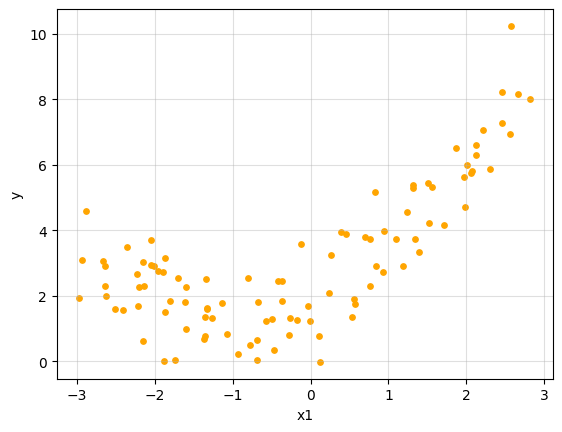

In [2]:
m = 100
#non-linear data
x1 = 6 * np.random.rand(m,1) - 3 #vector 1x100
y = 0.5 * x1**2 + x1 + 2 + np.random.randn(m,1) #normal distibuition 

plt.scatter(x1,y,c="orange",s=15)
plt.grid(alpha=0.4)
plt.xlabel("x1")
plt.ylabel("y")

In [3]:
#polynomial features

poly_transform=PolynomialFeatures(degree=2,include_bias=False)
x1_poly=poly_transform.fit_transform(x1)
#y_poly = 0.5 * x1_poly**2 + x1_poly + 2 + np.random.randn(m,1)

print(x1[0],x1_poly[0])


[-1.13540906] [-1.13540906  1.28915372]


we basically apply a square on each feature using:
X + features**2

In [4]:
#using a linear model:
from sklearn.linear_model import LinearRegression

lin_regression=LinearRegression()
lin_regression.fit(x1_poly[:],y) #x plus its polinomial features

l2=LinearRegression()
l2.fit(x1,y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Text(0, 0.5, 'y')

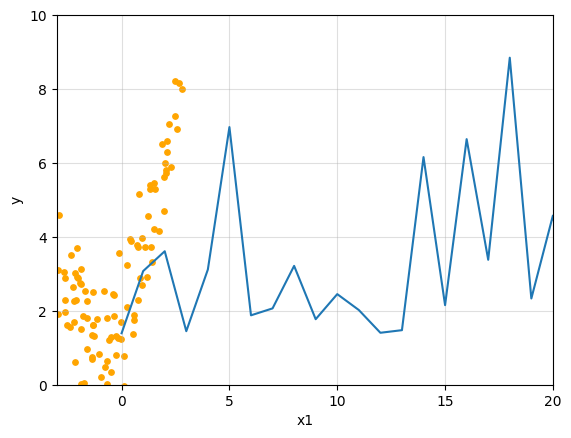

In [5]:

y_poly_predict = lin_regression.predict(x1_poly)
y2=l2.predict(x1)


plt.scatter(x1,y,c="orange",s=15)
plt.plot(y_poly_predict)
plt.axis([-3,20,0,10])
plt.grid(alpha=0.4)
plt.xlabel("x1")
plt.ylabel("y")

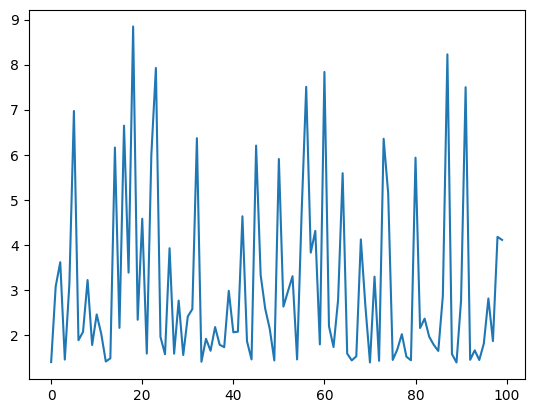

In [6]:
plt.plot(y_poly_predict)

Other degrees:




Text(0, 0.5, 'y')

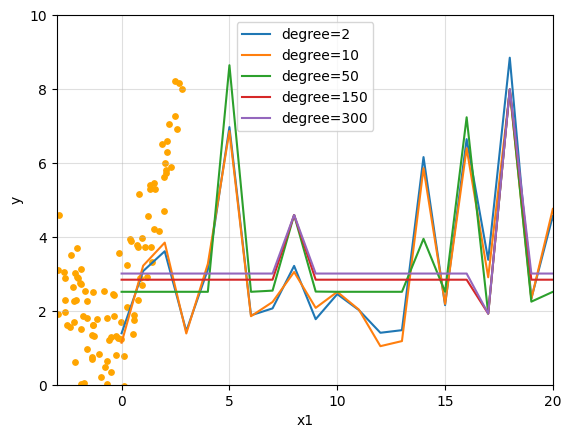

In [7]:
poly_transform2=PolynomialFeatures(degree=10,include_bias=False)
poly_transform3=PolynomialFeatures(degree=50,include_bias=False)
poly_transform4=PolynomialFeatures(degree=150,include_bias=False)
poly_transform5=PolynomialFeatures(degree=300,include_bias=False)

lin_regression2=LinearRegression()
x2=poly_transform2.fit_transform(x1)
y2=lin_regression2.fit(x2,y)
y22=lin_regression2.predict(x2)

lin_regression3=LinearRegression()
x3=poly_transform3.fit_transform(x1)
y3=lin_regression3.fit(x3,y)
y33=lin_regression3.predict(x3)

lin_regression4=LinearRegression()
x4=poly_transform4.fit_transform(x1)
y4=lin_regression4.fit(x4,y)
y44=lin_regression4.predict(x4)

lin_regression5=LinearRegression()
x5=poly_transform5.fit_transform(x1)
y5=lin_regression5.fit(x5,y)
y55=lin_regression5.predict(x5)

plt.scatter(x1,y,c="orange",s=15)

plt.plot(y_poly_predict,label='degree=2')
plt.plot(y22,label='degree=10')
plt.plot(y33,label='degree=50')
plt.plot(y44,label='degree=150')
plt.plot(y55,label='degree=300')


plt.axis([-3,20,0,10])
plt.legend()
plt.grid(alpha=0.4)
plt.xlabel("x1")
plt.ylabel("y")

Best: degree=2~50

Another way to see how good the model peforms is ploting his leaning curves.
Leaning curves consists in compare model RMSE with different train set sizes.

Let's see it with a Polynomial degree=10 and a Normal Linear Regression:


In [37]:
def learning_curves(model,X,y):

    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    train_errors,test_errors=[],[]

    for m in range(1,len(x_train)):
        model.fit(x_train[:m],y_train[:m])
        y_train_predict=model.predict(x_train[:m])
        y_test_predict=model.predict(x_test)

        test_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        train_errors.append(mean_squared_error(y_test,y_test_predict))

    plt.plot(np.sqrt(train_errors),'r-.',linewidth=2,label='train set')
    plt.plot(np.sqrt(test_errors),'b-+',linewidth=2,label='test set (generalization)')


    plt.grid(color='g',alpha=0.3)
    plt.xlabel("train size")
    plt.ylabel("RMSE")
    plt.legend()
    #plt.show()

#using a Pipeline for comapare Polynomial and Linear

from sklearn.pipeline import Pipeline

poly_model=Pipeline([
    ("poly_features",PolynomialFeatures(degree=2,include_bias=False)),
    ("linear reg",LinearRegression())
])

lg=LinearRegression()


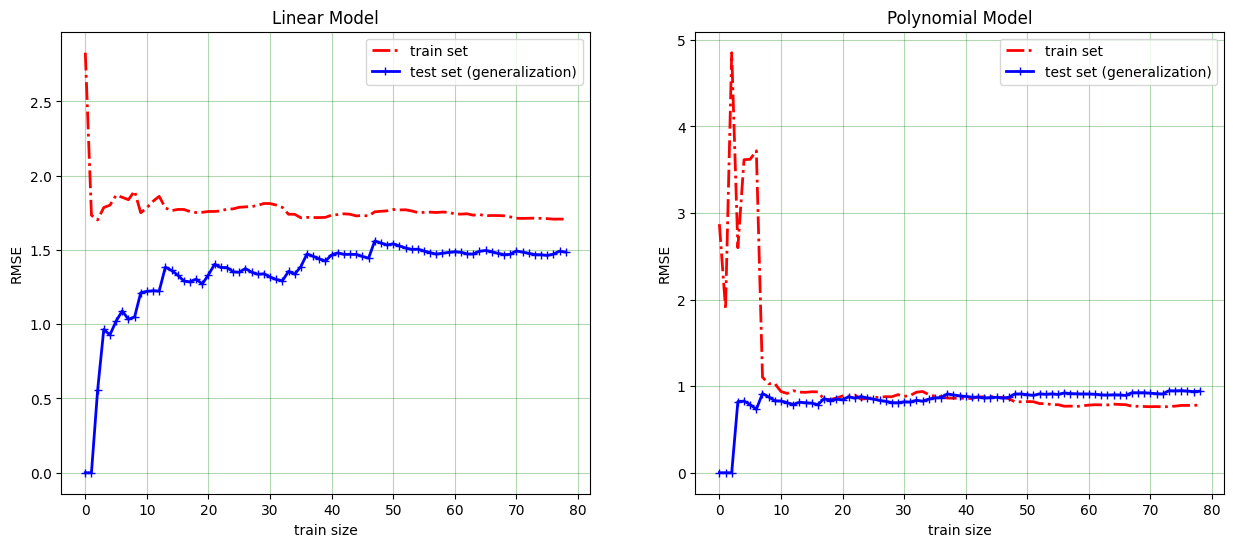

In [43]:
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.title("Linear Model")
learning_curves(lg,x1,y)

plt.subplot(122)
plt.title("Polynomial Model")
learning_curves(poly_model,x1,y)